## Implementation notes



This notebook has been used in a classroom setting

-   show the shape of Morse potential
-   illustrate connections between Morse parameters and molecular parameters (equilibrium bond length, bond strength)



## Comparing Morse potentials of several diatomics



General form for (simple) harmonic potential
$$ V(r) = \frac{1}{2}k(r-r_e)^2$$

General form for the [Morse potential](https://en.wikipedia.org/wiki/Morse_potential)

$$V_m(r)= De \left [ 1 − e^{−β(r−r_e)} \right ] ^{2} $$
where $\alpha = \sqrt{k/2D_e}$

The independent variable is $r-r_e$.



## Python Environment



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
# style.use("seaborn-talk")
import numpy as np

from scipy.constants import hbar
from scipy.constants import Planck as h
from scipy.constants import Boltzmann as kB

## Task: Use the Morse potential to model bonds in diatomic molecules.



**Plan:** Calculate and plot the Morse potential for several diatomic molecules in a series.  

Vm() takes molecular parameters from a textbook or NIST Webbook.  Eho and Eaho calculate the classical harmonic and quantum anharmonic energy levels, respectively.



In [1]:
def Vm(r, re, k, D):
    "Morse potential at r given spectroscopic constants"

    alpha = np.sqrt(k/(2*D))
    return D * (1 - np.exp(-alpha*(r - re)))**2

def Eho(nu, v=0):
    """Harmonic oscillator energy (J) of vibrational level v.
    nu is frequency in s^-1"""

    return h*nu*(v+1/2)

def Eaho(nu, v, D0):
    """Anharmonic energy (J) of vibrational level v.
    nu=frequency (s^-1)
    D0=depth (J/molec)"""

    De = D0 + Eho(nu, 0)
    return h*nu*(v+1/2) - (h*nu)**2 / (4*De) * (v+1/2)**2

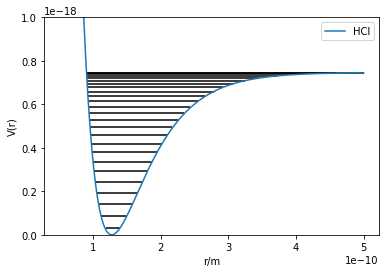

In [1]:
pm = 1e-12 # picometer/meter conversion
r = np.linspace(50*pm, 500*pm, 500)  # internuclear separation, m

# HCl spectroscopic parameters from Engle & Reid, 3rd, Table 19.3 
re = 127.5 * pm        # equilbrium separation, m
D0 = 7.17e-19          # dissociation energy from E0, J/molecule
k = 516                # force constant, N/m
nu = 8.97e13           # frequency, Hz
zpe = Eho(nu, 0)       # zero-point energy, J
HCl = [re, k, D0+zpe]  # list of parameters to pass to Vm()
V_HCl = Vm(r, *HCl)    # Morse potential for HCl

plt.plot(r, V_HCl, label="HCl")
plt.xlabel('r/m'); plt.ylabel('V(r)')
plt.ylim(0, 1e-18)
plt.legend()

# plot some vibrational energy levels on Morse curve
vlevels = np.arange(25)
Elevels = Eaho(nu, vlevels, D0)

for level in Elevels:
    xmin = r[np.where(V_HCl < level)][0]
    xmax = r[np.where(V_HCl < level)][-1]
    plt.hlines(level, xmin, xmax)

Note the energy is in J/molecule.  For comparison, recall what region of the EM spectrum excites vibrational transitions.  Also, compare to the energy available at room temperature.  Is it likely an HCl molecule with be in an excited state at room temp?



In [1]:
kB * 300 # T in K; result in J

4.141945559999999e-21

Repeat for other hydrogen halides.



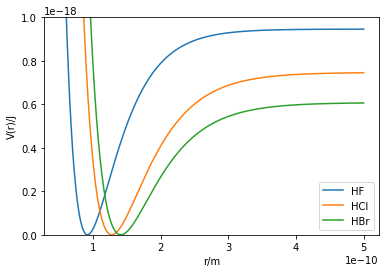

In [1]:
# parameters for HF
re = 91.68*pm  # m
k = 966        # N/m
D0 = 9.46e-19  # J/molecule
nu = 1.24e14   # Hz
zpe = Eho(0,nu) # J
HF = (re, k, D0+zpe)

# parms for HBr
nu = 7.94e13
zpe = Eho(0,7.94e13)
HBr = [141.*pm, 412, 6.08e-19+zpe]

names = ['HF', 'HCl', 'HBr']
for name, parms in zip(names, (HF, HCl, HBr)):
    plt.plot(r, Vm(r, *parms), label=name)
plt.legend()
plt.ylim(0,1e-18)
plt.xlabel('r/m'); plt.ylabel('V(r)/J');

Often these curves are plotted with $V(r\rightarrow \infty)=0$.  It is reasonable to define [zero potential](https://en.wikipedia.org/wiki/Morse_potential#Potential_energy_function) anywhere, so separated atoms is a convenient choice for $V=0$.



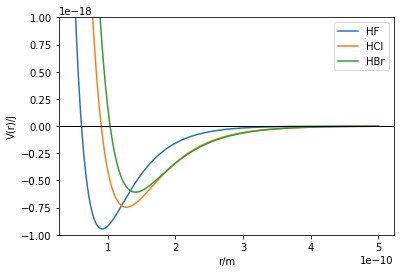

In [1]:
names = ['HF', 'HCl', 'HBr']

for name, parms in zip(names, (HF, HCl, HBr)):
    offset = Vm(1e-9, *parms)   # arbitrarily large value for r
    plt.plot(r, Vm(r, *parms)-offset, label=name)
    plt.legend()
plt.ylim(-1e-18,1e-18)
plt.axhline(0,lw=1, color='k')
plt.xlabel('r/m'); plt.ylabel('V(r)/J');

## Comparing double and triple bonds



Predict the behavior of the potential curves for single, double, and triple bonds in molecules.  Then plot them.



*Solution*



In [1]:
# values from ER3 Table 19.3
# N2
nu = 7.07e13   # Hz
k = 2295       # Nm
re = 109.8*pm  # m
D0 = 1.57e-18 + Eho(nu, 0)  # J
N2 = [re, k, D0]

# O2 parameters
O2 = [120.8*pm, 1177, 8.27e-19 + Eho(4.74e14, 0)]

# CO parameters
CO = [112.8*pm, 1902, 1.79e-18 + Eho(6.51e13, 0)]

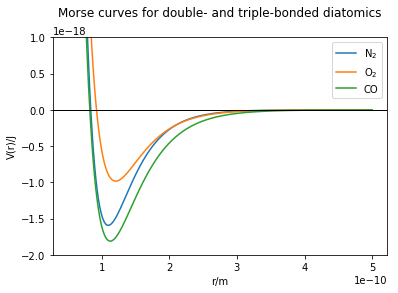

In [1]:
for name, parms in zip(['N$_2$','O$_2$','CO'],[N2, O2, CO]):
    plt.plot(r, Vm(r, *parms)-Vm(10e-10,*parms), label = name)
plt.axhline(0, color='k', lw=1)
plt.ylim(-2e-18, 1e-18)
plt.legend()
plt.xlabel('r/m')
plt.ylabel('V(r)/J')
plt.title("Morse curves for double- and triple-bonded diatomics\n");

## Questions



-   Why do potentials have minima at different values of $r$?
-   What is the physical meaning of the depth of the potential well?
-   What is the physical meaning of the potentials approaching zero at large values of $r$?
-   What is the physical meaning of the potentials crossing zero at small values of $r$?
-   What determines the curvature (&ldquo;steepness&rdquo;) of the well?
-   How are vibrational frequency and bond strength related?
-   How are vibrational frequency and atomic mass related?



## Appendix



Python tricks

-   Functions can have arguments with default values assigned in the function defintion.  Arguments with default values must come after arguments without default values
-   Arguments can be passed to a function in many forms like lists or objects (see the list of molecular parameters above).
-   \`\*\` arguments and **tuple unpacking** are handy when lots of arguments are being passed.  Search terms for more information: &ldquo;star arguments&rdquo;, &ldquo;kwarg python&rdquo;, &ldquo;tuple unpacking&rdquo;.

